### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable is the condition of the test, the mix of congruent and incongruent words.  The dependent variable is the response time required to complete the test successfully.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

H0: There is no significant difference in time for the population to state the colors of the words in a congruent or incongruent condition.

H1: There is a significant difference in time for the population to state the colors of the words if they take tests in the congruent condition vs the incongruent condition.

H0: μcongruent $=$ μincongruent

H1: μcongruent $\neq$ μincongruent

The test that will be used later in this report is a paired t-test using bootstrapping.  This is because the data frame involved contains a small sample of people taking both tests from a population that we assume to be normally distributed.  We also do not know the population information.s

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm

df = pd.read_csv('stroopdata.csv')
df.head(3)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


### central tendency

In [2]:
cong_mean = df['Congruent'].mean()
incong_mean = df['Incongruent'].mean()
cong_mean, incong_mean

(14.051124999999999, 22.015916666666666)

### variability

In [3]:
cong_std = df['Congruent'].std()
incong_std = df['Incongruent'].std()
cong_std, incong_std

(3.5593579576451955, 4.7970571224691376)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

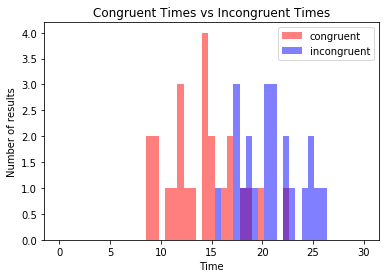

In [4]:
bins = np.linspace(0, 30)
plt.hist(df['Congruent'], bins, alpha=.5, color='red', label='congruent')
plt.hist(df['Incongruent'], bins, alpha=.5, color='blue', label='incongruent')

plt.ylabel('Number of results')
plt.xlabel('Time')
plt.title('Congruent Times vs Incongruent Times')
plt.legend()

The double histogram shows that most of the incongruent tests took longer than the congruent tests.  There is some overlap between both tests in terms of duration of time.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [5]:
sample_diffs = df['Incongruent'] - df['Congruent']
sample_mean = sample_diffs.mean()

In [6]:
# Perform the statistical test here
mean_diffs = []
for _ in range(10000):
    c_mean = df['Congruent'].sample(24, replace=True).mean()
    i_mean = df['Incongruent'].sample(24, replace=True).mean()
    mean_diffs.append(i_mean - c_mean)

mean_diffs = np.array(mean_diffs)

In [7]:
null_vals = np.random.normal(0, mean_diffs.std(), 10000)

In [8]:
(null_vals > sample_mean).mean()

0.0

The Type I error associated with this test is concluding that there is a difference in test times when it comes to congruency vs incongruency when in fact there is no difference.

With a P-value of 0, the conclusion that the null hypothesis is true must be rejected.  Results matched up with the expectations that, on average, incongruent tests take longer than congruent tests.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think that the conflicting messages of seeing a color and reading a different color caused subjects longer to successfully complete the tests.

A similar test that can have a similar effect is having subjects give the correct count of written numbers (1 through 10), where the amount of instances of a number does not match the charactor or word of the number itself. 